 # Unsupervised learning for red wine characteristics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action = 'ignore', category = DataConversionWarning)
pd.options.display.max_rows = 10
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [30]:
#Importing redwine database from csv
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep =";") 

In [31]:
#replacing spaces in csv columns with underscores so python can read  the code
df.columns = df.columns.str.replace(' ', '_')

In [32]:
#inital dataset
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


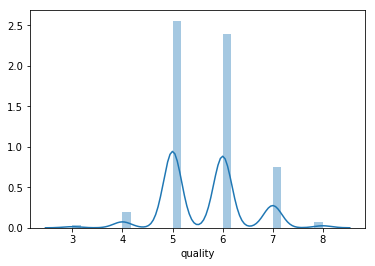

In [33]:
#distibution of target variable
sns.distplot(df.quality) 

**Note** Since the variable we want to predict on is almost a normal distrubtion, clusters will aggregate mostly in the middle of the data. But, with enough clusters I'm, sure we can see the differences between scores that occur far from the mean (3 and 8)

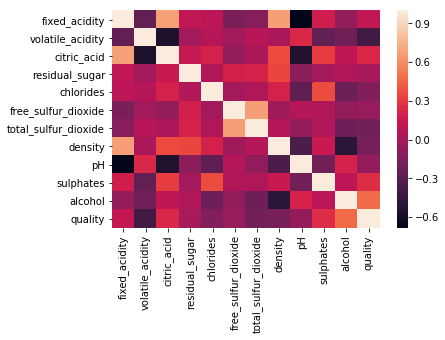

In [34]:
#correaltional heatmap of variable. 
sns.heatmap(df.corr())

**Note** There are already some strong correlations between quality and other variables, volatile acditiy should be high with low quality and alcohol should be high with high quality. Let's see if the unsupervised learning validates this assumption

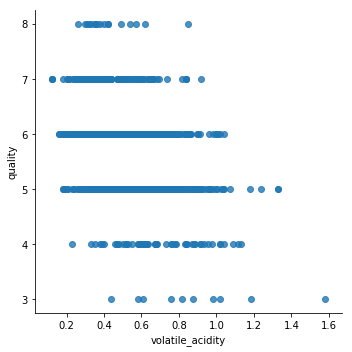

In [7]:
#scatterplot of volatile acidity and quality
sns.lmplot(x = 'volatile_acidity', y = 'quality', data=df,fit_reg=False)

**Note** Like the above observation, there is a small negative trend in volatile acidity.

### Using K Means Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality.

In [35]:
#loading in and scaling data for easier analysis
X = pd.DataFrame(scale(df), index=df.index, columns=df.columns)

In [36]:
#printing out dataframe with scaled data
X 

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


In [37]:
#setting up k-means clustering fit with 2 clusters and 20 times the k-means algorithim will run centroid seeds
kmeans = KMeans(n_clusters = 2, n_init = 20)

In [38]:
#fitting scaled data set to kmeans algorithim
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [12]:
#printing out a few labels predicted by k-means clusters
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [48]:
#displaying cluster means
X['Cluster1'] = kmeans.labels_
X1 = X.groupby('Cluster1').mean()
X1.sort_values(by=['quality'])
#dropping clusters that were left over from earlier code
X1.drop(['Cluster9','Cluster'], axis=1)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Cluster1,,,,,,,,,,,,
0,0.888454,-0.732129,0.996016,0.126412,0.232916,-0.180120,-0.250038,0.390161,-0.677257,0.567348,0.290888,0.463596
1,-0.509812,0.420109,-0.571533,-0.072537,-0.133652,0.103356,0.143477,-0.223882,0.388623,-0.325555,-0.166917,-0.266020


**Answer** From the initial k-means clustering, fixed acidity has a strong positive difference between clusters, and volatile acidity has a strong negative relationship. Alcohol seems to have a weaker relationship that I would have assumed. Citric acide has a strong positive relationship as well. PH (acid) and sulphates have a negative and positive relationship respectivly.

Text(0.5, 1.0, 'Elbow curve of clusters within Red Wine data')

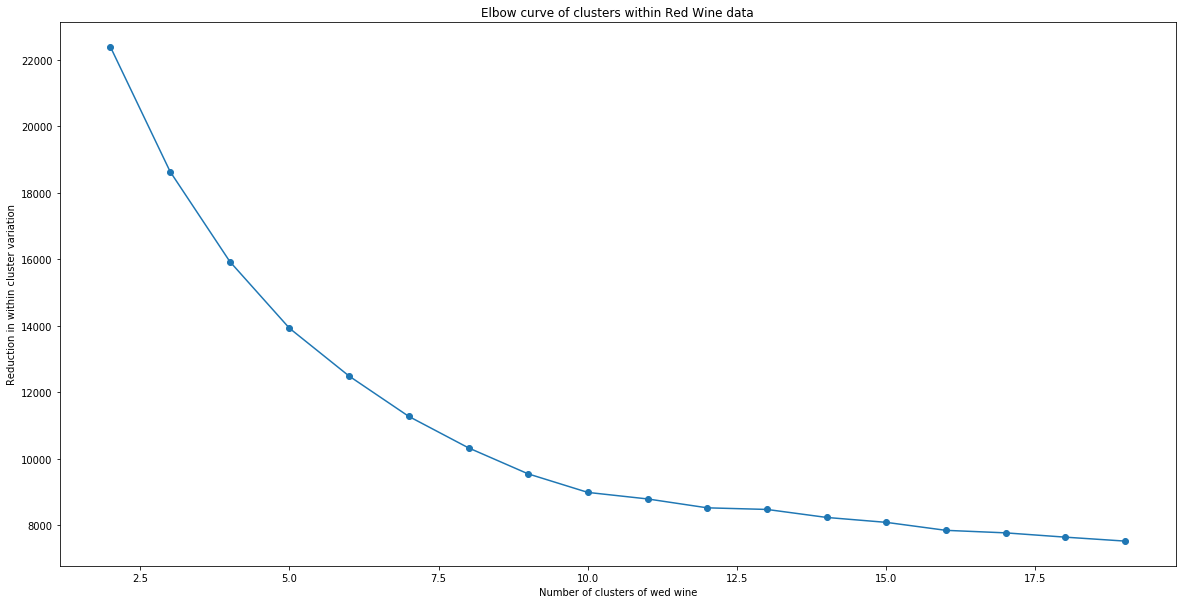

In [49]:
#Running an elbow curve to see the optimum number of clusters
within_cluster_variance = [] 


for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    within_cluster_variance.append(kmeans.inertia_)

fig = plt.figure(figsize=(20, 10))
plt.plot(range(2, 20), within_cluster_variance, marker='o')
plt.xlabel('Number of clusters of wed wine')
plt.ylabel('Reduction in within cluster variation')
plt.title('Elbow curve of clusters within Red Wine data')

**Note** 10 neighbours looks like the ideal number of clusters to reduce within cluster variation

In [53]:
#Running K-means clustering with 10 clusters
kmeans2 = KMeans(n_clusters = 10, n_init = 20)
kmeans2.fit(X)
kmeans2.labels_
X['Cluster9'] = kmeans2.labels_
dfk = X.groupby('Cluster9').mean()
dfk = dfk.drop(['Cluster','Cluster1'], axis=1)
dfk.sort_values(by=['quality'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Cluster9,,,,,,,,,,,,
1,-0.615446,1.306033,-1.083640,-0.009421,-0.063274,-0.454113,-0.451954,0.046393,0.883177,-0.509012,-0.355379,-0.950806
6,0.003158,0.427128,0.083412,0.122142,0.039638,0.738653,1.609809,0.332012,-0.390426,-0.421733,-0.752600,-0.648721
5,0.070110,-0.023904,1.390011,-0.391139,6.635415,-0.079685,0.187234,0.176665,-1.597336,3.141076,-0.940690,-0.426544
7,-0.302443,0.240180,-0.555939,-0.323348,-0.036717,-0.562634,-0.432116,-0.040389,-0.016877,-0.354957,-0.587164,-0.195780
8,-0.174375,-0.029272,0.266651,5.176832,0.319860,1.727145,1.699467,1.193778,-0.297735,-0.190862,-0.460630,-0.108551
4,-0.648975,-0.189944,-0.466207,-0.260425,-0.218097,1.233481,0.533892,-0.276316,0.588800,-0.083277,-0.191137,-0.103091
3,1.688216,-0.548660,1.229294,0.120903,0.033375,-0.543314,-0.470079,1.217299,-1.011053,0.111274,-0.156679,0.051277
2,0.550191,-0.585831,0.733153,-0.001329,0.048774,1.159531,0.728721,0.501599,-0.333385,1.528499,0.031760,0.267863
9,-1.073671,0.266919,-0.801969,-0.225780,-0.433533,-0.055800,-0.279044,-1.408046,1.133510,-0.182301,1.340395,0.599489


### Using Hierarchical Cluster Analysis to identify cluster(s) of observations that have high and low values of the wine quality. 

In [54]:
#Reloading to the data and scaling it for easier analysis
dfh = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep =";")
Xh = pd.DataFrame(scale(dfh), index=df.index, columns=df.columns)

In [59]:
#creating a hierachal cluser analysis while using complete linkage and using 10 clusters as the previous example.
from sklearn.cluster import AgglomerativeClustering

aclust = AgglomerativeClustering(n_clusters=10,   
                             affinity='euclidean', 
                             linkage='complete')

hielabels = aclust.fit_predict(X)    
Xh['Clusterh'] = hielabels
Xhc = Xh.groupby('Clusterh').mean()

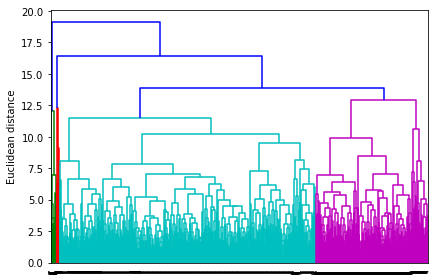

In [58]:
#creating a dendogram bhased on euclidean distance of clusters and labels
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(Xh.values, method='complete', metric='euclidean')

row_dendr = dendrogram(row_clusters, 
                       labels=hielabels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

In [60]:
#showing hierarchal cluster analysis groupoed by cluster and arranged by quality 
Xhc.sort_values(by=['quality'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Clusterh,,,,,,,,,,,,
7,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
3,-0.615446,1.306033,-1.083640,-0.009421,-0.063274,-0.454113,-0.451954,0.046393,0.883177,-0.509012,-0.355379,-0.950806
0,-0.483474,0.172787,0.137809,3.091954,0.138860,1.754234,2.195176,0.639598,-0.019361,0.042275,-0.326642,-0.439446
5,0.052219,-0.064271,0.319309,0.043416,0.226112,0.575680,1.763899,0.444182,-1.207584,3.871622,-0.481029,-0.396663
8,0.048669,-0.003612,1.176051,-0.440880,6.094523,-0.141879,0.222436,0.118594,-1.491813,2.815328,-0.943921,-0.356981
1,0.116892,-0.040528,0.022563,-0.163897,-0.042484,0.175395,0.207486,0.245787,-0.155578,-0.174429,-0.448420,-0.204246
2,0.338224,-0.648891,0.641150,7.303740,0.668432,1.350792,0.842294,1.950444,-0.606546,0.084691,-0.608244,0.037958
9,-1.073671,0.266919,-0.801969,-0.225780,-0.433533,-0.055800,-0.279044,-1.408046,1.133510,-0.182301,1.340395,0.599489
4,2.568242,-0.256887,1.600478,0.557426,-0.004277,-0.534500,-0.418230,1.750913,-1.515959,0.613099,0.532052,0.703638


In [63]:
dfk.sort_values(by=['quality'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Cluster9,,,,,,,,,,,,
1,-0.615446,1.306033,-1.083640,-0.009421,-0.063274,-0.454113,-0.451954,0.046393,0.883177,-0.509012,-0.355379,-0.950806
6,0.003158,0.427128,0.083412,0.122142,0.039638,0.738653,1.609809,0.332012,-0.390426,-0.421733,-0.752600,-0.648721
5,0.070110,-0.023904,1.390011,-0.391139,6.635415,-0.079685,0.187234,0.176665,-1.597336,3.141076,-0.940690,-0.426544
7,-0.302443,0.240180,-0.555939,-0.323348,-0.036717,-0.562634,-0.432116,-0.040389,-0.016877,-0.354957,-0.587164,-0.195780
8,-0.174375,-0.029272,0.266651,5.176832,0.319860,1.727145,1.699467,1.193778,-0.297735,-0.190862,-0.460630,-0.108551
4,-0.648975,-0.189944,-0.466207,-0.260425,-0.218097,1.233481,0.533892,-0.276316,0.588800,-0.083277,-0.191137,-0.103091
3,1.688216,-0.548660,1.229294,0.120903,0.033375,-0.543314,-0.470079,1.217299,-1.011053,0.111274,-0.156679,0.051277
2,0.550191,-0.585831,0.733153,-0.001329,0.048774,1.159531,0.728721,0.501599,-0.333385,1.528499,0.031760,0.267863
9,-1.073671,0.266919,-0.801969,-0.225780,-0.433533,-0.055800,-0.279044,-1.408046,1.133510,-0.182301,1.340395,0.599489


In [62]:
Xhc.sort_values(by=['quality'])

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
Clusterh,,,,,,,,,,,,
7,0.074897,-0.350945,3.127368,0.043416,11.116408,0.394484,0.320274,0.770280,-2.663717,5.735193,-0.960246,-1.407158
3,-0.615446,1.306033,-1.083640,-0.009421,-0.063274,-0.454113,-0.451954,0.046393,0.883177,-0.509012,-0.355379,-0.950806
0,-0.483474,0.172787,0.137809,3.091954,0.138860,1.754234,2.195176,0.639598,-0.019361,0.042275,-0.326642,-0.439446
5,0.052219,-0.064271,0.319309,0.043416,0.226112,0.575680,1.763899,0.444182,-1.207584,3.871622,-0.481029,-0.396663
8,0.048669,-0.003612,1.176051,-0.440880,6.094523,-0.141879,0.222436,0.118594,-1.491813,2.815328,-0.943921,-0.356981
1,0.116892,-0.040528,0.022563,-0.163897,-0.042484,0.175395,0.207486,0.245787,-0.155578,-0.174429,-0.448420,-0.204246
2,0.338224,-0.648891,0.641150,7.303740,0.668432,1.350792,0.842294,1.950444,-0.606546,0.084691,-0.608244,0.037958
9,-1.073671,0.266919,-0.801969,-0.225780,-0.433533,-0.055800,-0.279044,-1.408046,1.133510,-0.182301,1.340395,0.599489
4,2.568242,-0.256887,1.600478,0.557426,-0.004277,-0.534500,-0.418230,1.750913,-1.515959,0.613099,0.532052,0.703638


**Answer** The two top clusers of Hierachal analysis and k-means clusters differ on predictor variables like: fixed acidity, volatile acidity, citric acid, Ph levels, and sulfates. However both agree that alcohol is postively correalted with quality. it would seem that alcohol is the only variable among the list that accuraetly varies with quality of wine. 

### Using Principal Components Analysis

In [18]:
#reading in dataframe new third time and scaling
dfp = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep =";")
Xp = pd.DataFrame(scale(dfp), index=dfp.index, columns=dfp.columns)

In [19]:
#running principle component analysis with 4 components
pca = PCA(n_components=4)

In [20]:
#fitting new data to principle component analysis
pca.fit(Xp)

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [21]:
#transforming data into its principle components 
x_pca = pca.transform(Xp)

In [66]:
#shape of principle components
x_pca.shape

(1599, 4)

Text(0, 0.5, "second Principal Component')")

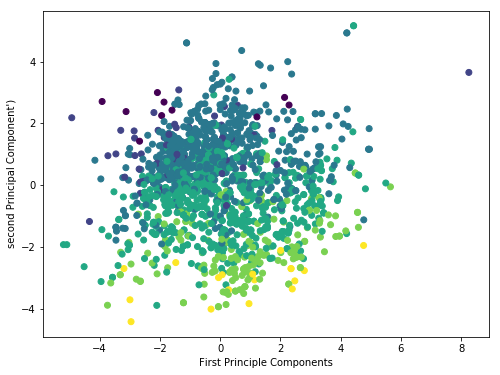

In [23]:
#graph of first two principle components and where quality wines cluster in principle components
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dfp['quality'])
plt.xlabel('First Principle Components')
plt.ylabel("second Principal Component')")

In [25]:
# what values of variables are in principle components
dfp_comp = pd.DataFrame(pca.components_,columns=dfp.columns)
dfp_comp

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.487883,-0.265129,0.473335,0.139154,0.197427,-0.045881,0.004067,0.370301,-0.432721,0.254535,-0.073177,0.112489
1,-0.004173,0.338968,-0.137358,0.167736,0.189788,0.259483,0.363971,0.330781,-0.065440,-0.109334,-0.502709,-0.473166
2,-0.164829,-0.227089,0.100229,0.243620,-0.026608,0.616111,0.540732,-0.168723,0.069771,0.212913,0.224971,0.223369
3,-0.231098,0.041858,-0.056736,-0.383038,0.654778,-0.033711,-0.028460,-0.200693,-0.005466,0.560502,-0.091701,-0.036669


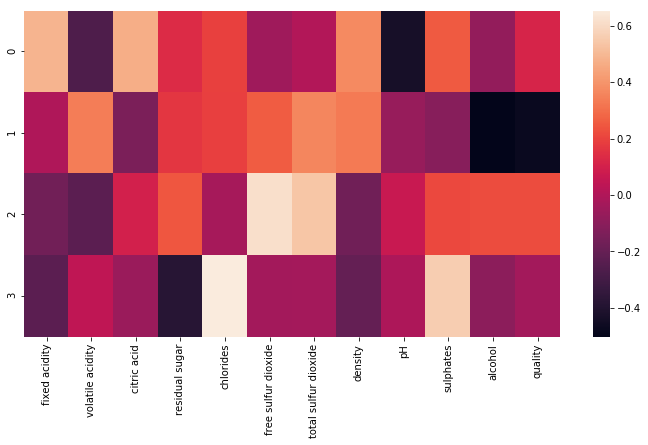

In [26]:
#heat map of above components and how much representated they are each principle compoenent
plt.figure(figsize = (12,6))
sns.heatmap(dfp_comp)

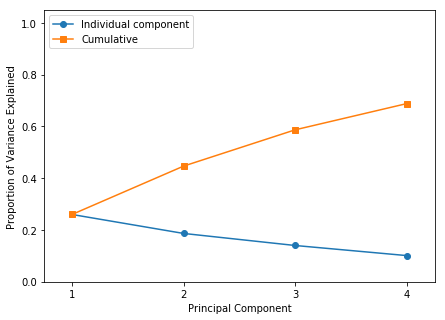

In [27]:
#plot of principle component variance accountability
plt.figure(figsize=(7,5))

plt.plot([1,2,3,4], pca.explained_variance_ratio_, '-o', label='Individual component')
plt.plot([1,2,3,4], np.cumsum(pca.explained_variance_ratio_), '-s', label='Cumulative')

plt.ylabel('Proportion of Variance Explained')
plt.xlabel('Principal Component')
plt.xlim(0.75,4.25)
plt.ylim(0,1.05)
plt.xticks([1,2,3,4])
plt.legend(loc=2);

**Answer** around 42% of variance is accounted for by the first two principle components